#### Grupo:

- Francisco Lucas Galdino da Silva,
- Moisés da Rocha Alves,
- Paulo Vitor de Queiroz Ferreira.

<hr/>

Pode fazer download do notebook do desafio e da pasta `ratas` e trabalhar no seu notebook favorito (Deepnote, Colab, Jupyter Notebook...)

Entregue sua solução em formato notebook (.ipynb), com seu nome no começo (por exemplo: `DiegoLaplagne_Desafio04_NumPy.ipynb`) seguindo o link:
> https://www.dropbox.com/request/8MrRpKE3GhqwF9QJwZUb



## Desafio 4: Edição de vídeo com NumPy
As imagens 'ratas0001.png', 'ratas0002.png', ... contém frames de um vídeo de comportamento de ratos. As imagens são coloridas (RGB), portanto cada uma pode ser representada por um array de 3 dimensões, onde a terceira tem longitude 3.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

1. Carregue uma das imagens (`plt.imread()`) e confira que a variável criada é um ndarray. Quantas dimensões tem o array? Qual o tamanho de cada dimensão?  
Use a função `plt.imshow()` para visualizar o array como imagem.

**Resposta:** o output gerado pelo print mostra que a variável que contém a imagem lida é um ndarray com 3 dimensões, com tamanhos (862, 988, 3).

<class 'numpy.ndarray'> (862, 988, 3) 3 float32


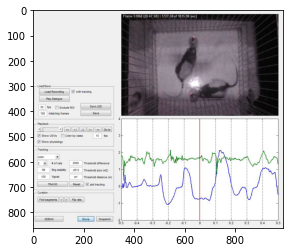

In [2]:
uma_imagem = plt.imread('ratas/ratas0001.png')  

plt.imshow(uma_imagem)
print(type(uma_imagem), uma_imagem.shape, uma_imagem.ndim, uma_imagem.dtype)

2. Carregue as imagens **5 a 24** em um ndarray de **4 dimensões**.  
Um jeito possível é:
- Crie primeiro um ndarray de zeros (`np.zeros()`) com as dimensões finais esperadas (quais seriam?) e chame esse array de `video`.
- Programe um loop que carregue cada imagem (`plt.imread()`) e coloque ela no lugar certo do array `video`.  
***
Para conseguir gerar os nomes das imagens a serem carregadas, vão precisar usar algum método para formatar números em strings e fazer 'zero padding'. Tem varios jeitos de fazer isso. Eu gosto de f'{}' ("F Strings")  
https://pythonacademy.com.br/blog/f-strings-no-python#utilizando-formatadores-especiais

<class 'numpy.ndarray'> (862, 988, 3) 3 float32
<class 'numpy.ndarray'> (862, 988, 3, 20) 4 float64


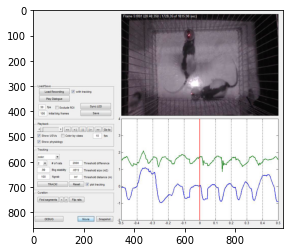

In [3]:
uma_imagem = plt.imread('ratas/ratas0001.png')
imagemInicial = 5
imagemFinal = 24
video = np.zeros(uma_imagem[:,:,:,np.newaxis].shape)
for f in range(imagemInicial, imagemFinal+1):
    nome = "ratas/ratas00{frame:02}.png".format(frame=f)
    frame = plt.imread(nome)
    video = np.concatenate((video, frame[:,:,:,np.newaxis]), axis=3)

# Exclui a array inicial de zeros
video = video[:,:,:,1:]

# Dados da imagem inicial lida
print(type(uma_imagem), uma_imagem.shape, uma_imagem.ndim, uma_imagem.dtype)
# Dados do array gerado
print(type(video), video.shape, video.ndim, video.dtype)
# Mostra frame específico da array do vídeo
plt.imshow(video[:,:,:,19])

In [4]:
# Quem tiver dificuldade em carregar as imagens pode carregar um array 'video' já pronto (e perder algum pontinho de nota, claro!)
# video = np.load('ratas/video.npy')

## Abajo el Loop!
> A partir daqui não pode usar mais loops. Tem Universal Functions para todas suas necesidades.
Cada loop perde um ponto na nota!

Podem ir conferindo que as imagens vão ficando do jeito desejado usando, por exemplo, `plt.imshow()`

2. A partir do array `video`, crie um array novo chamado `videito` incluindo só o canto das imagens onde tem os ratos.

**Resposta:** Nota-se que o vídeo só onde tem os ratos está aproximadamente contido no intervalo de pixels de x = [17, 417] e y = [349, 969]. Separaremos este espaço no vídeo.

<class 'numpy.ndarray'> (401, 621, 3, 20) 4 float64


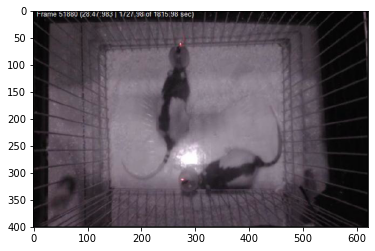

In [5]:
videito = video[17:418, 349:970, :, :]

# Dados do array
print(type(videito), videito.shape, videito.ndim, videito.dtype)

# Mostra frame específico da array do vídeo recortada
plt.imshow(videito[:,:,:,8])

3. Crie um novo array chamado `videito_gray` com a versão em tons de cinza de `videito`. Cada frame da nova versão será a media das camadas R, G e B de cada frame original (`np.mean()`).
***
Nota: para fazer à função `imshow()` usar tons de cinza para representar arrays de 2 dimensões, usar o parámetro `cmap='gray'` 

<class 'numpy.ndarray'> (401, 621, 20) 3 float64


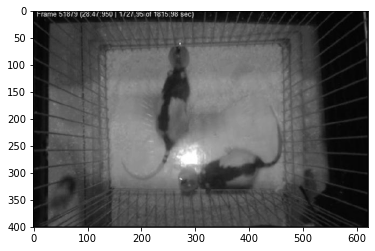

In [6]:

videito_gray = np.mean(videito, axis=2)

# Dados do array
print(type(videito_gray), videito_gray.shape, videito_gray.ndim, videito_gray.dtype)

# Mostra frame específico da array em tons de cinza
plt.imshow(videito_gray[:,:,7], cmap = 'gray')

4. Copie o `videito_gray` para um novo nd array chamado `videito_claro` (`.copy()`). Multiplique todos os valores de videito_claro por 2 e, na sequencia, subtitua todos os valores maiores do que 1 pelo valor 1 (um jeito é lembrar de boolean masks). Desse jeito você aumentou a luminosidade do vídeo.  

<class 'numpy.ndarray'> (401, 621, 20) 3 float64


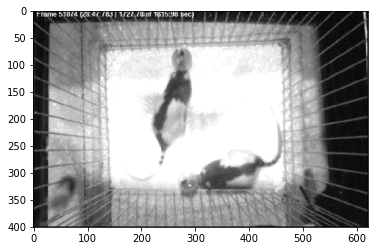

In [7]:
videito_claro = 2*videito_gray.copy()

booleanmask = videito_claro > 1
videito_claro[booleanmask] = 1

# Dados do array
print(type(videito_claro), videito_claro.shape, videito_claro.ndim, videito_claro.dtype)

# Mostra frame específico da array com luminosidade aumentada
plt.imshow(videito_claro[:,:,2], cmap = 'gray')

5. Completamente opcional: exporte um arquivo de video a partir do array `videito_gray`. Vai ter que pesquisar na net com quais modules para python pode criar arquivos de video. Boa sorte!
(OK PODE USAR UM LOOP!)

**Resposta:** utilizei o módulo opencv2 para python.

In [8]:
import cv2

height, width, frames = videito_gray.shape
size = (width,height)
fps = 10

out = cv2.VideoWriter('ratos.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

for i in range(frames):
    gray = cv2.normalize(videito_gray[:,:,i], None, 255, 0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    gray_3c = cv2.merge([gray, gray, gray])
    out.write(gray_3c)
out.release()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c144539-2972-44cc-ad68-f0f53d581094' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>